In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/student_demography.csv')
df.head()

,index,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,province,region
0,1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B,Province 3,Hilly
1,5,412,Morang,Morang,kalo pul,Foot,5,4,West,25B,Province 2,Terai
2,4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B,Province 3,Hilly
3,2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B,Province 3,Hilly
4,3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B,Province 3,Hilly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           132 non-null    int64 
 1   Id              132 non-null    int64 
 2   Born            132 non-null    object
 3   Raised          132 non-null    object
 4   Residence       132 non-null    object
 5   Transportation  132 non-null    object
 6   Commute         132 non-null    int64 
 7   Family          132 non-null    int64 
 8   Area            132 non-null    object
 9   Batch           132 non-null    object
 10  province        132 non-null    object
 11  region          132 non-null    object
dtypes: int64(4), object(8)
memory usage: 12.5+ KB


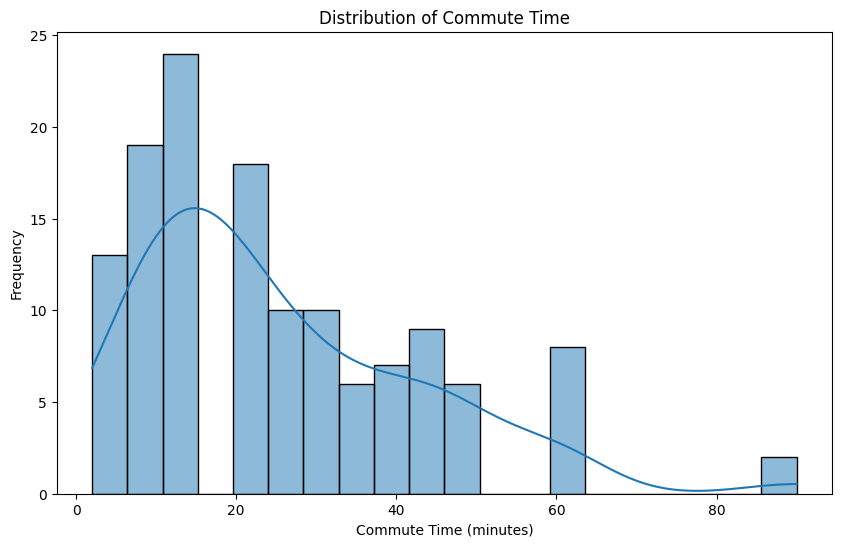

In [4]:
# Distribution of commute time
plt.figure(figsize=(10, 6))
sns.histplot(df['Commute'], bins=20, kde=True)
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Commute Time')
plt.show()

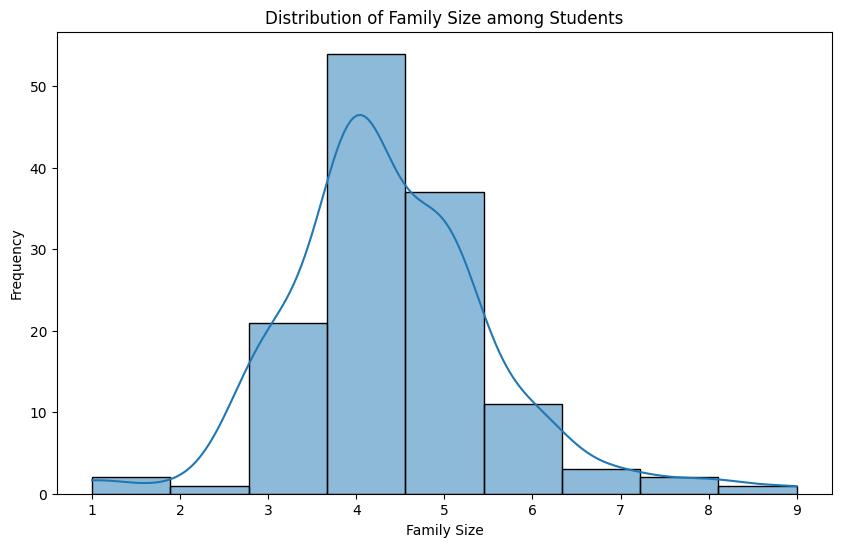

In [5]:
# Family size distribution among students
plt.figure(figsize=(10, 6))
sns.histplot(df['Family'], bins=9, kde=True)
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Distribution of Family Size among Students')
plt.show()

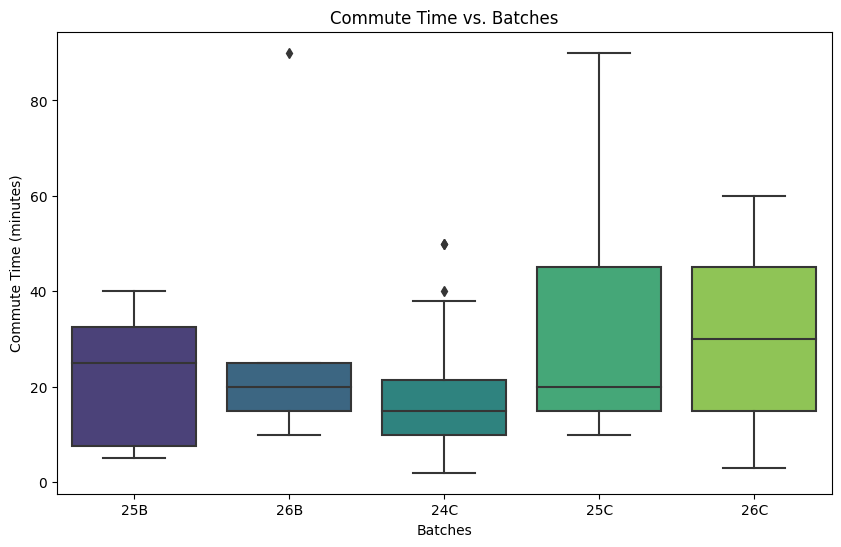

In [6]:
# Commute time with different batches
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Commute', data=df, palette='viridis')
plt.xlabel('Batches')
plt.ylabel('Commute Time (minutes)')
plt.title('Commute Time vs. Batches')
plt.show()

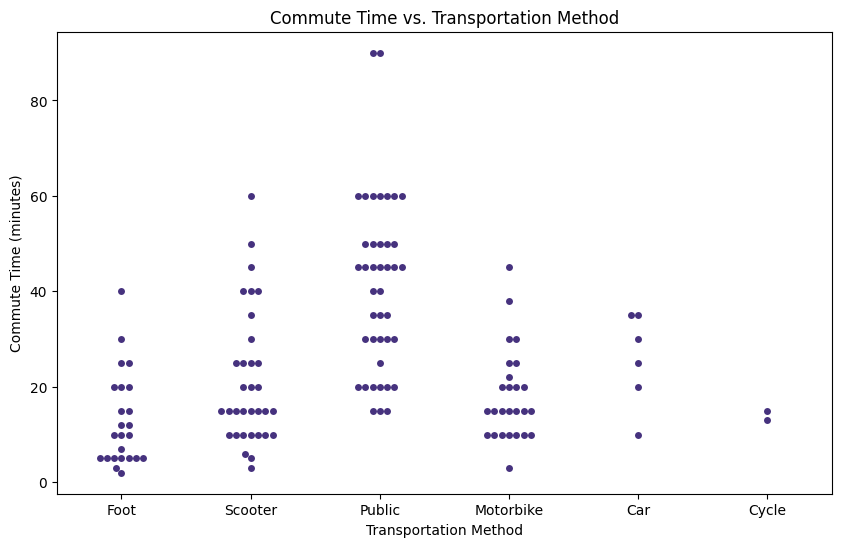

In [7]:
# # Commute time with different transportation methods
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Transportation', y='Commute', data=df, palette='viridis')
# plt.xlabel('Transportation Method')
# plt.ylabel('Commute Time (minutes)')
# plt.title('Commute Time vs. Transportation Method')
# #plt.xticks(rotation=45)
# plt.show()

sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Transportation', y='Commute', data=df)
plt.xlabel('Transportation Method')
plt.ylabel('Commute Time (minutes)')
plt.title('Commute Time vs. Transportation Method')

plt.show()

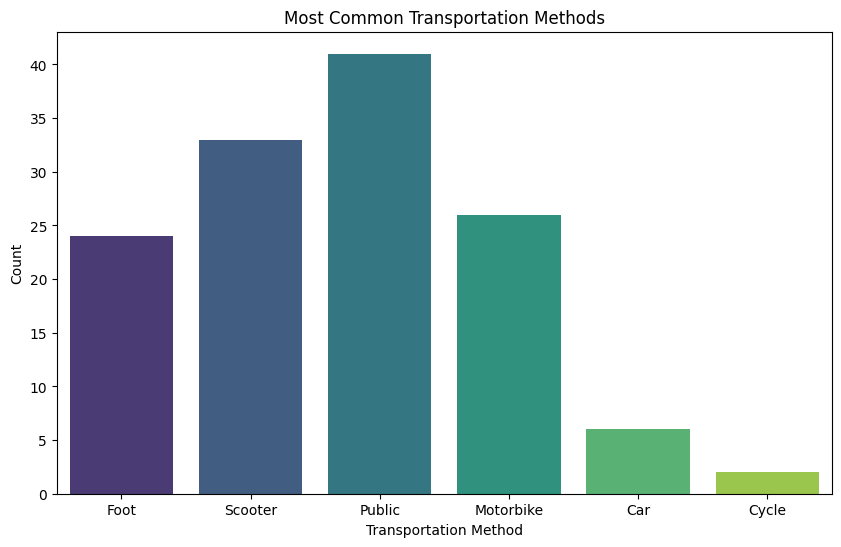

In [8]:
# Most common means of transportation used by students
plt.figure(figsize=(10, 6))
sns.countplot(x='Transportation', data=df, palette='viridis')
plt.xlabel('Transportation Method')
plt.ylabel('Count')
plt.title('Most Common Transportation Methods')
plt.show()

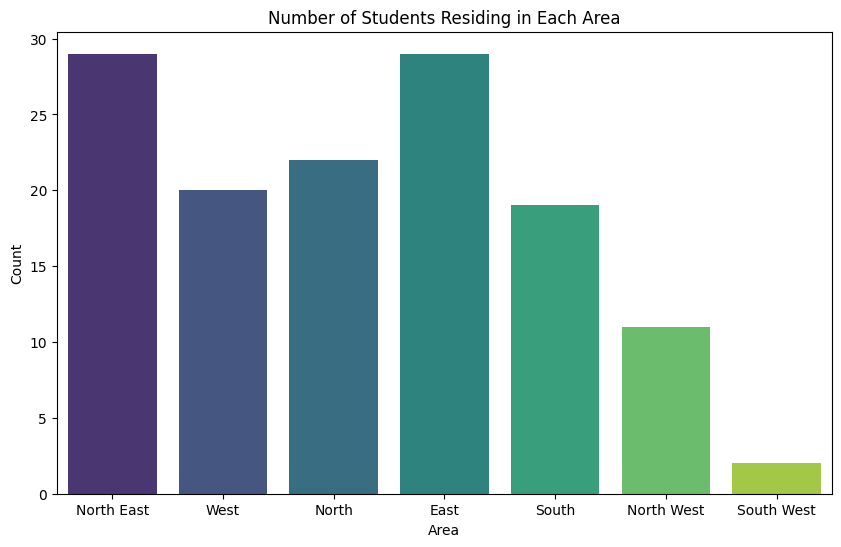

In [9]:
# Number of students residing in each area
plt.figure(figsize=(10, 6))
sns.countplot(x='Area', data=df, palette='viridis')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Number of Students Residing in Each Area')
plt.show()

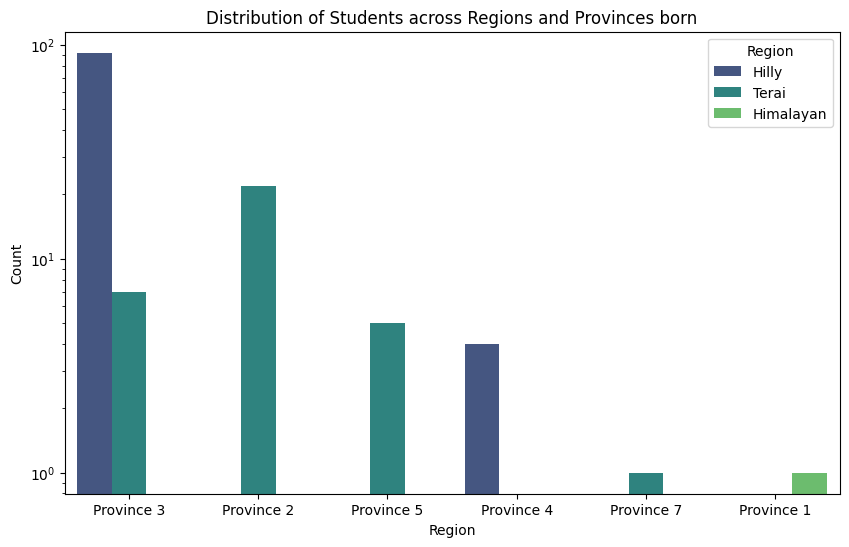

In [10]:
# Regions and provinces where most students come from
plt.figure(figsize=(10, 6))
sns.countplot(x='province', data=df, hue='region', palette='viridis')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Students across Regions and Provinces born')
plt.legend(title='Region', loc='upper right')
plt.yscale('log')
plt.show()

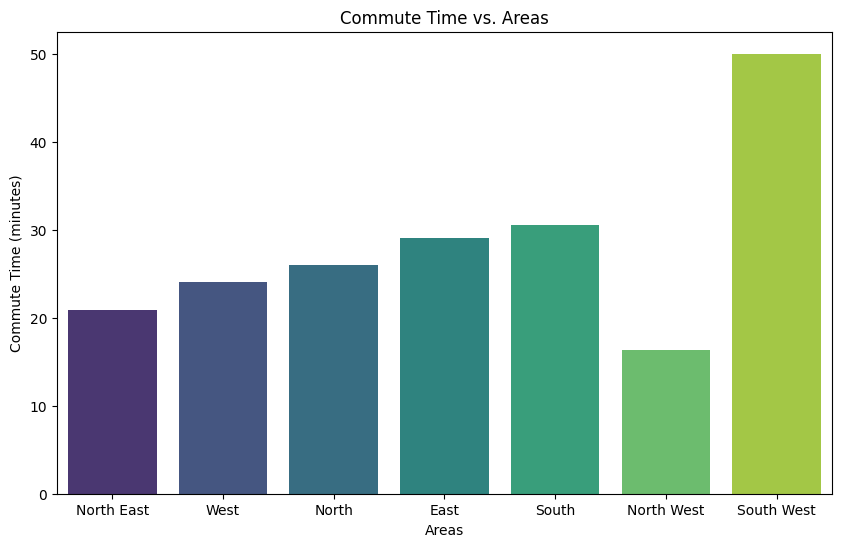

In [11]:
# Commute time with different areas
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Commute', data=df, palette='viridis', errorbar=None)
plt.xlabel('Areas')
plt.ylabel('Commute Time (minutes)')
plt.title('Commute Time vs. Areas')
plt.show()

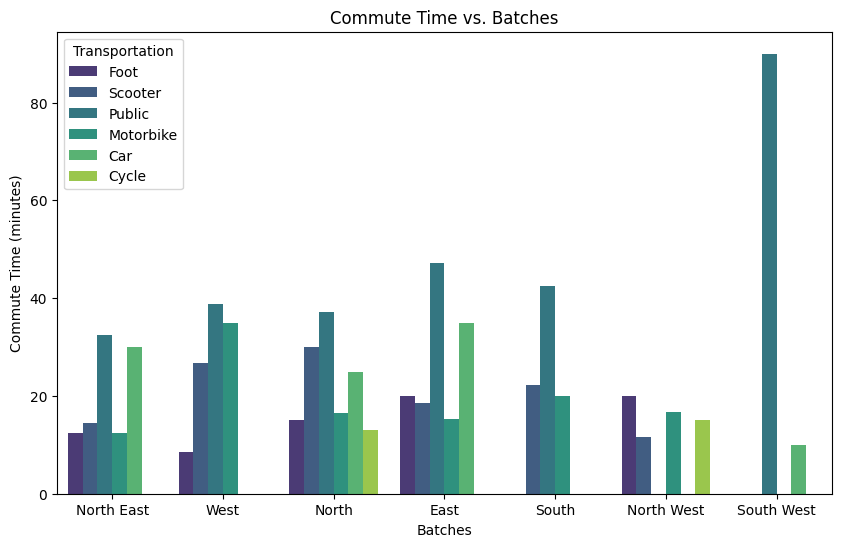

In [12]:
# Commute time with different batches
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Commute', data=df, hue='Transportation', palette='viridis', errorbar=None)
plt.xlabel('Batches')
plt.ylabel('Commute Time (minutes)')
plt.title('Commute Time vs. Batches')
plt.show()

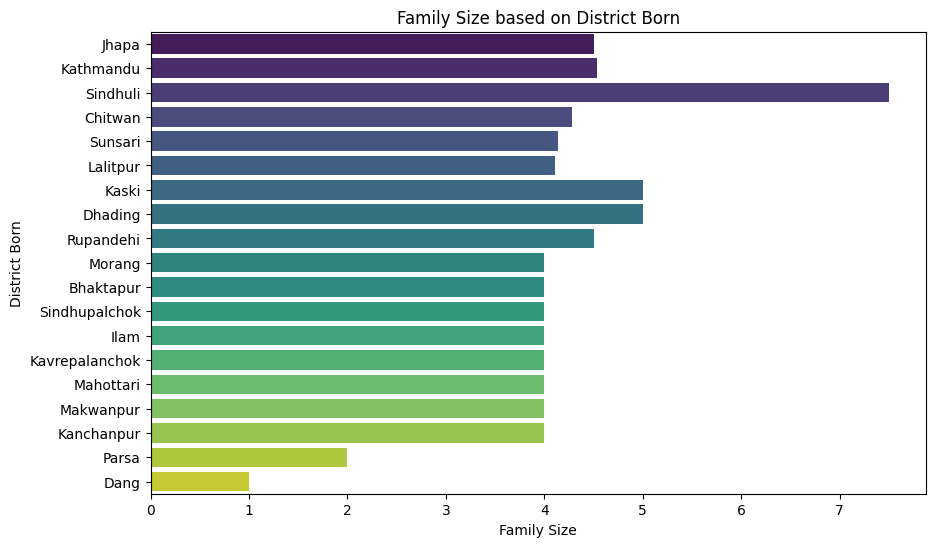

In [13]:
# Family size based on district born
sorted_df = df.sort_values(by='Family', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Born', data=sorted_df, palette='viridis', errorbar=None)
plt.xlabel('Family Size')
plt.ylabel('District Born')
plt.title('Family Size based on District Born')
plt.show()

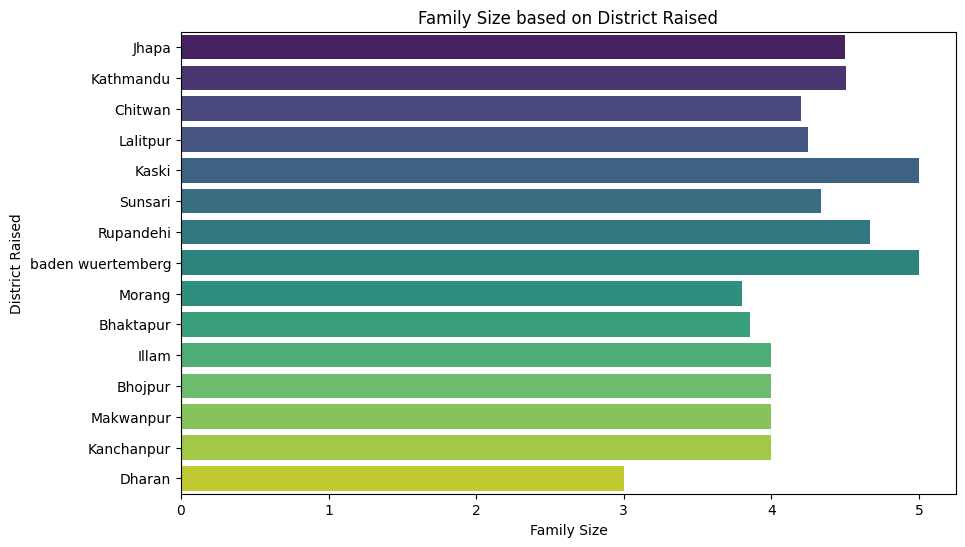

In [14]:
# Family size based of district raised
sorted_df = df.sort_values(by='Family', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Raised', data=sorted_df, palette='viridis', errorbar=None)
plt.xlabel('Family Size')
plt.ylabel('District Raised')
plt.title('Family Size based on District Raised')
plt.show()

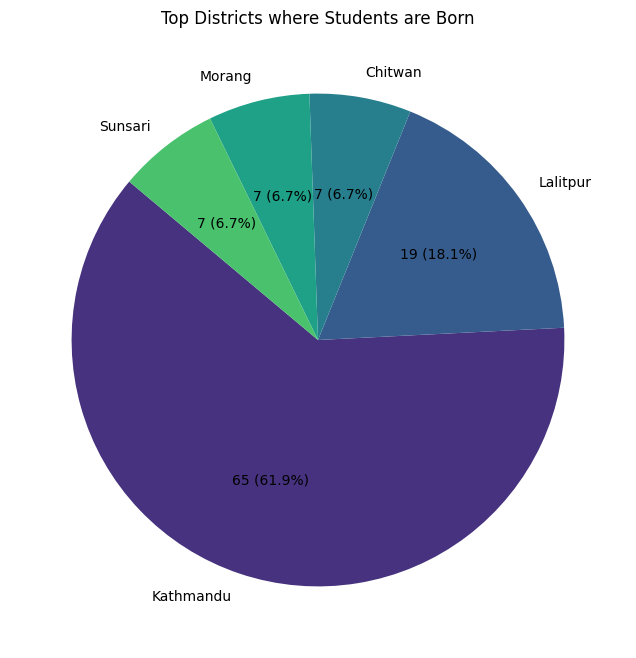

In [15]:
# Top districts were students are born
disct_counts = df['Born'].value_counts()
top_districts = disct_counts.head()

plt.figure(figsize=(8, 8))
sns.set_palette("viridis")
plt.pie(top_districts, labels=top_districts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(top_districts) / 100, p),
        startangle=140)
plt.title('Top Districts where Students are Born')
plt.show()

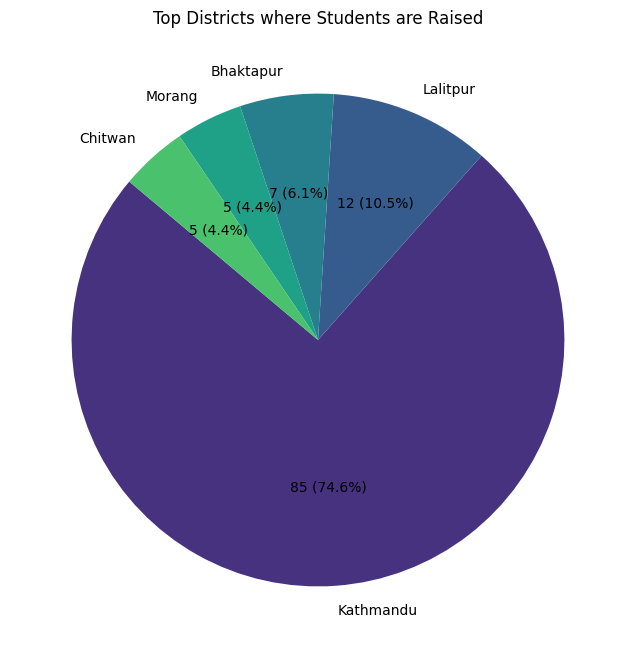

In [16]:
# top districts were students are raised
disct_counts = df['Raised'].value_counts()
top_districts = disct_counts.head()

plt.figure(figsize=(8, 8))
sns.set_palette("viridis")
plt.pie(top_districts, labels=top_districts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(top_districts) / 100, p),
        startangle=140)
plt.title('Top Districts where Students are Raised')
plt.show()

Text(0, 0.5, 'Commute (minutes)')

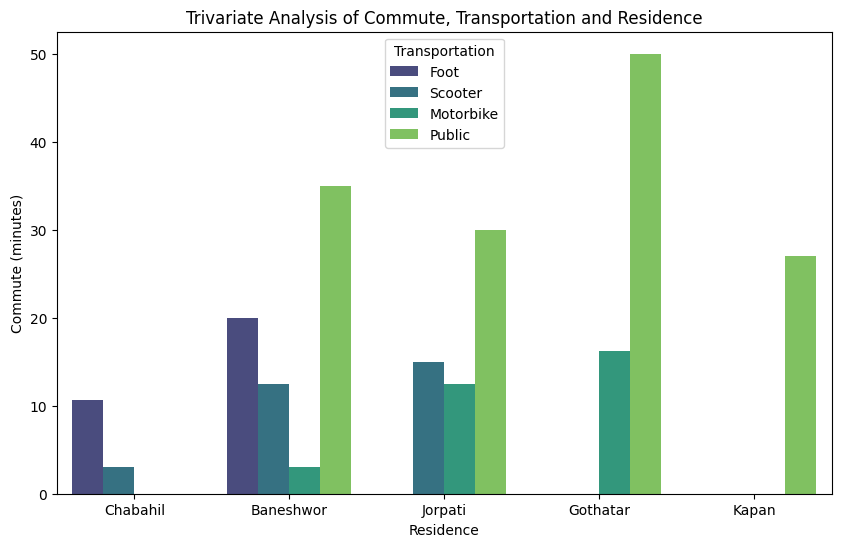

In [17]:
# Commute vs Transportation vs Residence
fig, ax = plt.subplots(figsize=(10,6))
top_residences = df['Residence'].value_counts().head(5).index.tolist()
df_top_residences = df[df['Residence'].isin(top_residences)]

sns.barplot(x='Residence', y='Commute', hue='Transportation', data=df_top_residences, ax=ax, errorbar=None, palette='viridis')
ax.set_title('Trivariate Analysis of Commute, Transportation and Residence')
ax.set_xlabel('Residence')
ax.set_ylabel('Commute (minutes)')

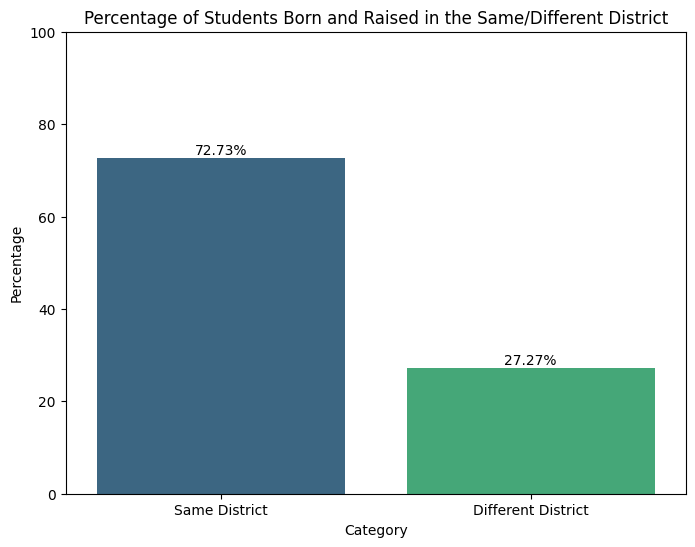

In [18]:
# Percentage of students born and raised in the same/different district
same_district_count = df[df["Born"] == df["Raised"]].shape[0]
total_students = df.shape[0]
same_district_percentage = (same_district_count / total_students) * 100

different_district_count = total_students - same_district_count
different_district_percentage = (different_district_count / total_students) * 100
data = {
    "Category": ["Same District", "Different District"],
    "Percentage": [same_district_percentage, different_district_percentage],
}
percentage_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x="Category", y="Percentage", data=percentage_df, palette='viridis')
plt.title("Percentage of Students Born and Raised in the Same/Different District")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.ylim(0, 100)

# Annotate
for index, value in enumerate(percentage_df["Percentage"]):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.show()

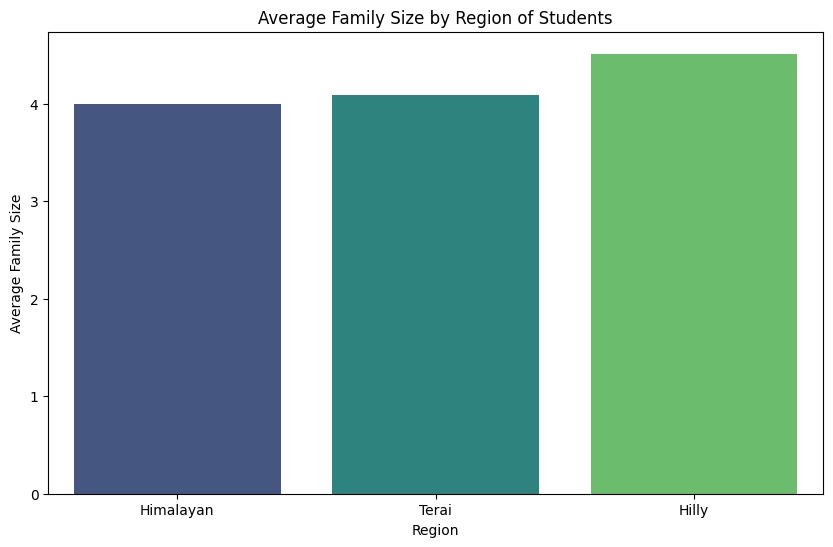

In [19]:
# Average family size by region of students born
average_family_size_by_region = df.groupby("region")["Family"].mean().reset_index()
average_family_size_by_region = average_family_size_by_region.sort_values(by="Family")

plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="Family", data=average_family_size_by_region, palette="viridis")
plt.title("Average Family Size by Region of Students")
plt.xlabel("Region")
plt.ylabel("Average Family Size")

plt.show()

In [20]:
average_family_size_by_province = df.groupby("province")["Family"].mean().reset_index().sort_values(by='Family')
average_family_size_by_province

# plt.figure(figsize=(10, 6))
# sns.barplot(x="province", y="Family", data=average_family_size_by_region, palette="viridis")
# plt.title("Average Family Size by Province of Students")
# plt.xlabel("Province")
# plt.ylabel("Average Family Size")

# plt.show()

,province,Family
4,Province 5,3.800000
0,Province 1,4.000000
5,Province 7,4.000000
1,Province 2,4.090909
2,Province 3,4.474747
3,Province 4,5.000000
